# Digit Classification with Neural Networks (MNIST)

In this notebook, we’ll build a **2-layer neural network from scratch using NumPy** to classify **handwritten digits** from the popular **MNIST dataset**.


## What You’ll Learn

- How to load and preprocess image data
- How neural networks work under the hood (no black boxes!)
- How to implement forward propagation with ReLU and Softmax
- How to compute categorical cross-entropy loss
- How to implement backpropagation and train the model
- How to evaluate a model and visualize predictions


## What Is MNIST?

- 70,000 grayscale images of handwritten digits (0–9)
- Each image is **28 × 28 pixels**
- Goal: Predict the correct digit label for each image


## Why This Project Matters

Understanding how neural networks work **under the hood** is essential for any machine learning practitioner.

Instead of relying on high-level libraries like TensorFlow or scikit-learn, this project builds everything from scratch using NumPy — layer by layer, function by function.

By doing so, we develop a clear intuition for:
- How neural networks process data through layers
- What activation functions really do
- How predictions turn into probabilities
- How loss functions and gradients guide learning

This hands-on approach helps bridge the gap between **theory and application**, and lays a solid foundation for tackling more complex models and real-world deep learning problems.


Let’s dive in!


## 1. Import Required Libraries

Before diving into the data and neural network code, we import the key Python libraries we'll use throughout this notebook:

- `numpy`  
  The foundational numerical computing library in Python. We'll use it to handle vectors, matrices, and all math operations during forward propagation and prediction.

- `tensorflow.keras.datasets`  
  Provides built-in access to the MNIST dataset. We'll use it to easily load our training and testing images.


- `matplotlib.pyplot`  
  A plotting library used to visualize images, training progress, and predictions. Essential for understanding how the model sees and classifies the digits.

With these three tools, we can build and train a neural network from scratch, visualize results, and better understand how it all works under the hood.


In [1]:
# For loading the dataset
import tensorflow as tf

# For numerical operations
import numpy as np

# For plotting and visualizations
import matplotlib.pyplot as plt

## 2. Load and Explore the MNIST Dataset

The MNIST dataset contains 70,000 grayscale images of handwritten digits (0 through 9).  
Each image is 28×28 pixels, and our goal is to build a neural network that can correctly classify which digit is shown.

We first load the dataset using `tensorflow.keras.datasets`, and visualize a few samples to understand the data we’re working with.

Each label corresponds to the correct digit in the image.


### 2.1 Load Dataset

In [2]:
# Load the dataset (downloads the first time)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display dataset shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


### 2.2 Visualize Some Digits

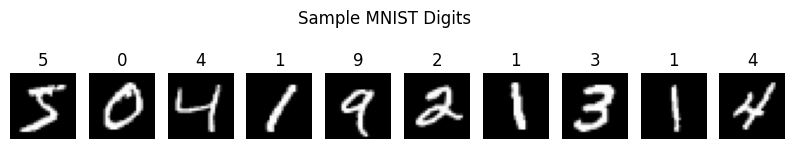

In [3]:
# Visualize the first 10 digits
plt.figure(figsize=(10, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")

plt.suptitle("Sample MNIST Digits")
plt.show()

## 3. Data Preprocessing

Before passing the images into our neural network, we need to preprocess them.

- **Flattening**: Each 28×28 image is reshaped into a 784-length vector so it can be fed into the input layer of the network.
- **Normalization**: Pixel values originally range from 0 to 255. We scale them down to the range 0 to 1 to make learning more stable and faster.
- **One-hot Encoding**: The labels (0–9) are converted into one-hot vectors so that the network can learn to classify each digit as a separate output class.

This prepares the data for forward propagation through the neural network.


### 3.1 Flatten Inputs Shape

In [4]:
# Flatten: reshape from (28, 28) → (784,)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

### 3.2 Normalize Input Values

In [5]:
# Normalize pixel values: from 0–255 → 0–1
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

### 3.3 One-Hot Encode Output Values

In [6]:
# One-hot encode the labels:
def one_hot_encode(y, num_classes=10):
    m = len(y)
    one_hot = np.zeros((m, num_classes))
    one_hot[np.arange(m), y] = 1
    return one_hot


y_train_encoded = one_hot_encode(y_train)
y_test_encoded = one_hot_encode(y_test)

# Print shape checks
print("X_train_flat shape:", X_train_flat.shape)
print("y_train_encoded shape:", y_train_encoded.shape)

X_train_flat shape: (60000, 784)
y_train_encoded shape: (60000, 10)


## 4. Implement Forward Propagation (ReLU + Softmax)

We’ll now build the forward pass of our neural network using two layers:

- **Layer 1 (Hidden)**: 784 inputs → 128 neurons → ReLU activation
- **Layer 2 (Output)**: 128 → 10 neurons (for 10 digits) → Softmax activation

This is a basic feedforward neural network:
1. Multiply inputs by weights and add biases
2. Apply non-linear activation
3. Pass results to the next layer
4. Get final class probabilities from Softmax


### 4.1 Initiate Parameters

In [7]:
# Layer sizes
n_inputs = X_train_flat.shape[1]  # 28x28 flattened
n_hidden = 128  # hidden layer neurons
n_outputs = 10  # digits 0–9

# Weight & bias initialization
np.random.seed(0)
W1 = 0.01 * np.random.randn(n_inputs, n_hidden)
b1 = np.zeros((1, n_hidden))
W2 = 0.01 * np.random.randn(n_hidden, n_outputs)
b2 = np.zeros((1, n_outputs))

### 4.2 ReLU Activation

In [8]:
# ReLU activation
def relu(z):
    return np.maximum(0, z)

### 4.3 Softmax Activation

In [9]:
# Softmax activation
def softmax(z):
    exp_values = np.exp(z - np.max(z, axis=1, keepdims=True))  # stability
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

### 4.4 Forward Propagation

In [10]:
# Forward pass
def forward_pass(x_train):
    # Layer 1
    z1 = np.dot(x_train, W1) + b1
    a1 = relu(z1)

    # Layer 2
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)

    return a1, a2


# Forward pass on first 5 training samples
A1, A2 = forward_pass(X_train_flat[:5])

print("Output probabilities (first sample):")
print(np.round(A2[0], 3))

print("Predicted class:", np.argmax(A2[0]))
print("True label:", y_train[0])

Output probabilities (first sample):
[0.1   0.1   0.1   0.1   0.099 0.101 0.1   0.099 0.101 0.1  ]
Predicted class: 8
True label: 5


## 5. Compute Loss (Categorical Cross-Entropy)

We now compute the categorical cross-entropy loss, which is a standard loss function for multiclass classification problems.

It measures how well the predicted probability distribution (from the softmax layer) matches the true one-hot encoded labels.

If the model is confident and correct, the loss is low. If the model is wrong or uncertain, the loss is higher.

The formula for a single sample is:

$$
\text{Loss} = -\log(\hat{y}_{\text{correct class}})
$$

We then average this loss over all samples in the batch.


In [11]:
# Categorical Cross Entropy
def categorical_cross_entropy(y_true, y_pred):
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Calculate loss for one-hot encoded targets
    if len(y_true.shape) == 2:
        correct_probs = np.sum(y_pred_clipped * y_true, axis=1)
    else:  # for integer labels
        correct_probs = y_pred_clipped[np.arange(len(y_pred_clipped)), y_true]
    
    negative_log_likelihoods = -np.log(correct_probs)
    return np.mean(negative_log_likelihoods)
        
# Forward pass on first 100 training samples
A1_100, A2_100 = forward_pass(X_train_flat[:100])
y_true = y_train_encoded[:100]

# Compute loss
loss_100 = categorical_cross_entropy(y_true, A2_100)
print("Loss:", loss_100)

Loss: 2.30370520670281


## 6. Backpropagation and Training Loop

Backpropagation is the process of computing the gradients of the loss function with respect to each parameter (weights and biases), and updating them using gradient descent.

We’ll implement a simple version for a 2-layer network:
- Output layer uses **Softmax + Categorical Cross-Entropy**
- Hidden layer uses **ReLU**

We’ll also define a training loop that runs forward and backward passes for a number of steps and prints loss over time.


### 6.1 Derivative of ReLU

In [12]:
# Derivative of ReLU
def relu_derivative(z):
    return (z > 0).astype(float)

### 6.2 Calculate Gradients

In [13]:
# Hyperparameters
learning_rate = 0.5
iterations = 2000

losses = []
previous_loss = float('inf')

for i in range(iterations):
    # ---- FORWARD PASS ----
    Z1 = np.dot(X_train_flat, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    
    # ---- LOSS ----
    loss = categorical_cross_entropy(y_train_encoded, A2)
    losses.append(loss)
    
    # ---- CONVERGENCE CHECK ----
    if abs(previous_loss - loss) < 1e-6:
        print(f"Converged at iteration {i} with loss = {loss:.6f}")
        break
        
    previous_loss = loss
    
    # ---- BACKWARD PASS ----

    # Output layer gradients
    dZ2 = A2 - y_train_encoded                # shape (m, 10)
    dW2 = np.dot(A1.T, dZ2) / X_train_flat.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train_flat.shape[0]
    
    # Hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train_flat.T, dZ1) / X_train_flat.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train_flat.shape[0]

    # ---- UPDATE WEIGHTS ----
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Print progress
    if i % 100 == 0 or i == iterations - 1:
        print(f"Iteration {i}: Loss = {loss:.4f}")

Iteration 0: Loss = 2.3024
Iteration 100: Loss = 0.3341
Iteration 200: Loss = 0.2558
Iteration 300: Loss = 0.2109
Iteration 400: Loss = 0.1790
Iteration 500: Loss = 0.1553
Iteration 600: Loss = 0.1368
Iteration 700: Loss = 0.1221
Iteration 800: Loss = 0.1100
Iteration 900: Loss = 0.0999
Iteration 1000: Loss = 0.0915
Iteration 1100: Loss = 0.0842
Iteration 1200: Loss = 0.0780
Iteration 1300: Loss = 0.0725
Iteration 1400: Loss = 0.0677
Iteration 1500: Loss = 0.0635
Iteration 1600: Loss = 0.0596
Iteration 1700: Loss = 0.0562
Iteration 1800: Loss = 0.0531
Iteration 1900: Loss = 0.0502
Iteration 1999: Loss = 0.0476


## 7. Evaluate the Trained Model on the Test Set

After training, we evaluate how well the model performs on unseen data. This helps us measure how well the model generalizes — not just memorizes the training set.

We’ll:
- Run a forward pass on the test set
- Get predicted classes (argmax of probabilities)
- Compare them to the true labels
- Compute accuracy as the proportion of correct predictions


In [14]:
# ---- Forward pass on test data ----
Z1_test = np.dot(X_test_flat, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = softmax(Z2_test)

# ---- Get predicted class labels ----
y_pred = np.argmax(A2_test, axis=1)
y_true = y_test  # These were not one-hot encoded

# ---- Compute accuracy ----
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

test_accuracy = accuracy(y_true, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 97.47%


## Training Loss Over Time

Visualizing the training loss helps us understand how the model is learning.

- The loss starts high and decreases over time as the model improves.
- A smooth, downward-sloping curve indicates successful learning.
- When the curve flattens, the model is converging (no longer making big improvements).

This plot gives a quick visual confirmation that training proceeded as expected.


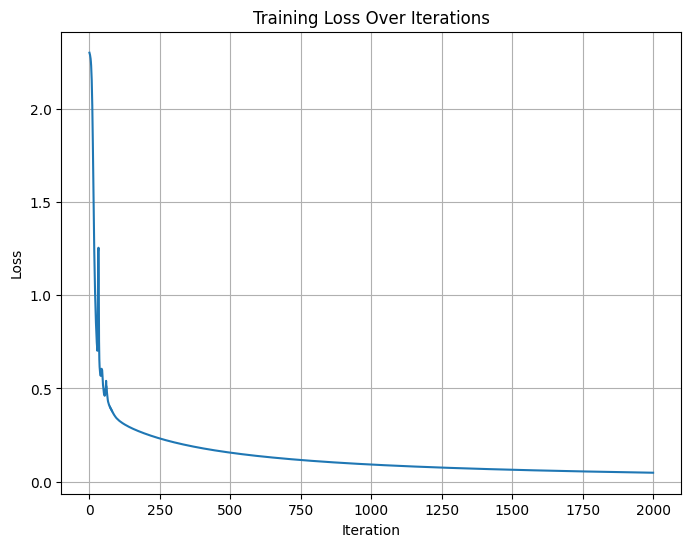

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(losses)
plt.title("Training Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Conclusion

In this project, we implemented a fully functional neural network from scratch using only NumPy — no ML libraries. Despite its simplicity, the model achieved **97.47% accuracy** on the MNIST test set.

This demonstrates a solid understanding of:
- Forward propagation
- Activation functions (ReLU, Softmax)
- Categorical cross-entropy loss
- Backpropagation with gradient descent

It's a powerful foundation for more advanced deep learning concepts, and a great portfolio project showing mastery beyond just using libraries.
